# Проект: Статистический анализ данных

Вы работаете аналитиком в сервисе аренды самокатов GoFast, который предоставляет услуги проката через мобильное приложение. Вашей задачей является анализ данных пользователей и их поездок с целью выявления закономерностей, которые помогут компании оптимизировать свой бизнес и повысить прибыль. Основное внимание будет уделено сравнению поведения пользователей с подпиской Ultra и без подписки (Free).

Цель анализа — понять, как подписка Ultra влияет на продолжительность и частоту поездок, а также на общий доход от пользователей. Результаты анализа помогут определить, выгодно ли компании продвигать подписку Ultra, и какие факторы могут способствовать увеличению количества подписчиков.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

**без подписки**

- абонентская плата отсутствует;

- стоимость одной минуты поездки — 8 рублей;

- стоимость старта (начала поездки) — 50 рублей;


**с подпиской Ultra** 

- абонентская плата — 199 рублей в месяц;

- стоимость одной минуты поездки — 6 рублей;

- стоимость старта — бесплатно.

 **Описание данных**

Данные, переданные для анализа, состоят из трёх таблиц:

**Пользователи — users_go.csv**

- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

**Поездки — rides_go.csv**

- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

**Подписки — subscriptions_go.csv**

- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа



## Загрузка данных

### **Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. Пути к файлам:**

- /datasets/users_go.csv
- /datasets/rides_go.csv
- /datasets/subscriptions_go.csv

In [1]:
#загрузки библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st


In [2]:
#загрузка данных

users_df = pd.read_csv('/datasets/users_go.csv')
rides_df = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'], dayfirst=True)
subscriptions_df = pd.read_csv('/datasets/subscriptions_go.csv')


In [3]:
#функция для вывода первых строк и информации о наборе данных

def dataset_info(dataset, dataset_name):
    print()
    print(f"Dataset: {dataset_name}")
    display(dataset.head())
    print("\nInfo:")
    dataset.info()
    print("_" * 60)


# Применение функции для каждого набора данных

dataset_info(users_df, "Users Data")
dataset_info(rides_df, "Rides Data")
dataset_info(subscriptions_df, "Subscriptions Data")



Dataset: Users Data


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
____________________________________________________________

Dataset: Rides Data


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
____________________________________________________________

Dataset: Subscriptions Data


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
____________________________________________________________


**Вывод:**

`users_df.info()`
- структура данных выглядит корректной. Все столбцы заполнены, а типы данных соответствуют ожидаемым значениям.

`rides_df.info()`
- дата сохранена в текстовом формате, что можно преобразовать в формат даты для удобства анализа.

`subscriptions_df.info()`
- данные небольшие

## Предобработка данных

### Создайте новый столбец с номером месяца на основе столбца date.

In [5]:
rides_df['month'] = rides_df['date'].dt.month

rides_df

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


In [6]:
rides_df['year'] = rides_df['date'].dt.year

rides_df['year'].value_counts().sort_index()

2021    18068
Name: year, dtype: int64

Данные собраны **за период 2021 года**

### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [7]:
#проверка на наличие пропущенных значений

display(users_df.isna().sum()) 
print("_______________________")
display(rides_df.isna().sum())
print("_______________________")
display(subscriptions_df.isna().sum())

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

_______________________


user_id     0
distance    0
duration    0
date        0
month       0
year        0
dtype: int64

_______________________


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [8]:
#проверка на наличие дубликатов

display(users_df.duplicated().sum())
print("__")
display(rides_df.duplicated().sum())
print("__")
display(subscriptions_df.duplicated().sum())

31

__


0

__


0

In [9]:
#даление дубликатов

users_df = users_df.drop_duplicates()

#проверка количества дубликатов после удаления

users_df.duplicated().sum()

0

**Вывод:**

- Привели **дату** к нужному формату (при загрузке данных в шаге 1), добавили столбец с **месяцем и годом**. Данные собраны за **2021 год**.
- **Пропусков** в данных нет.
- Нашли и убрали **дубликаты** в данных о пользователях. В поездках и подписках **дубликатов** не было.


## Исследовательский анализ данных

### Опишите и визуализируйте общую информацию о пользователях и поездках:

- частота встречаемости городов;
- соотношение пользователей с подпиской и без подписки;
- возраст пользователей;
- расстояние, которое пользователь преодолел за одну поездку;
- продолжительность поездок.

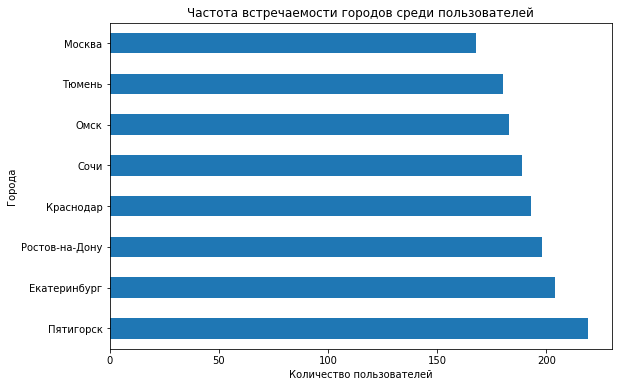

Пятигорск         14.3
Екатеринбург      13.3
Ростов-на-Дону    12.9
Краснодар         12.6
Сочи              12.3
Омск              11.9
Тюмень            11.7
Москва            11.0
Name: city, dtype: float64

In [10]:
#визуализация частоты встречаемости городов

plt.figure(figsize=(9, 6))
users_df['city'].value_counts().plot(kind='barh')
plt.title('Частота встречаемости городов среди пользователей')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()

city_procents = users_df['city'].value_counts() / users_df['city'].value_counts().sum() * 100
city_procents.round(1)

Наибольшее количество пользователей из **Пятигорска — 226 человек**

**Процентная разница** региональных различиях среди пользователей небольшая, и на её основе сложно делать выводы

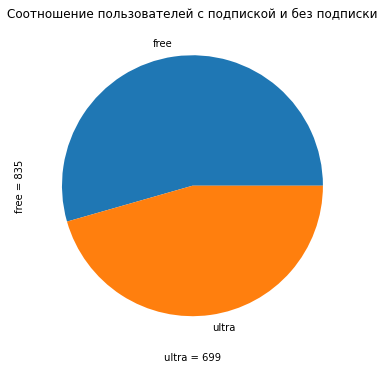

In [11]:
#соотношение пользователей с подпиской и без подписки

plt.figure(figsize=(6, 6))
users_df['subscription_type'].value_counts().plot(kind='pie')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('free = 835')
plt.xlabel('ultra = 699')
plt.show()

- **Без подписки**: 846 пользователей.
- **С подпиской**: 719 пользователей.

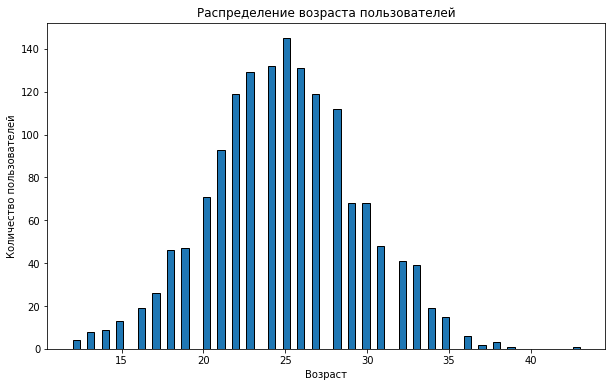

In [12]:
#возраст пользователей

plt.figure(figsize=(10, 6))
users_df['age'].plot(kind='hist', bins=70, edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()

<AxesSubplot:>

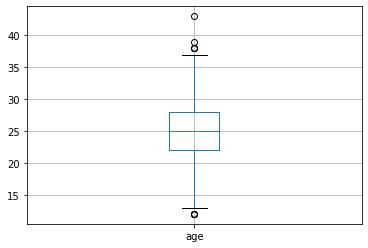

In [13]:
users_df.boxplot('age')

In [14]:
user_describe = users_df['age'].describe()
display(user_describe)
user_describe['75%'] - user_describe['25%']

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

6.0

- Средний возраст пользователей: **25 лет**.
- Возраст варьируется от **12 до 43 лет**.

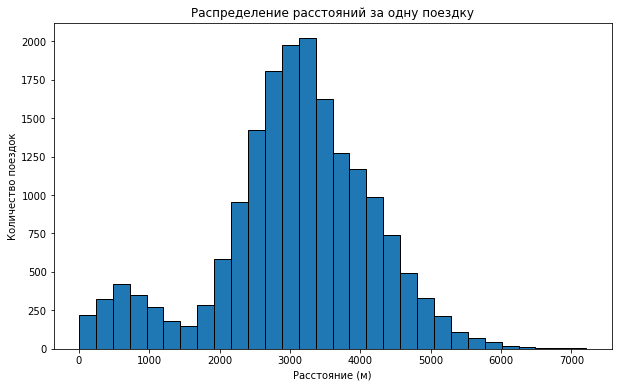

In [15]:
#расстояние, которое пользователь преодолел за одну поездку
plt.figure(figsize=(10, 6))
rides_df['distance'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Распределение расстояний за одну поездку')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок')
plt.show()

<AxesSubplot:>

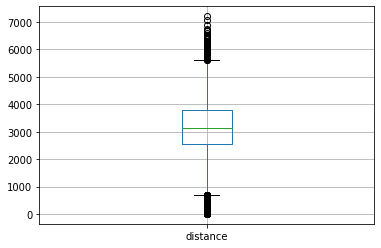

In [16]:
rides_df.boxplot('distance')

In [17]:
distance_describe = rides_df['distance'].describe()
display(distance_describe)
distance_describe['75%'] - distance_describe['25%']

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

1232.9963753558854

- Среднее расстояние за одну поездку: около **3000 км**.
- Максимальная дистанция поездки: **7км 211м**.

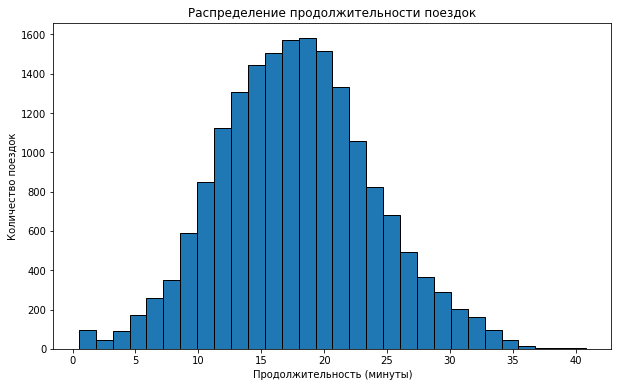

In [18]:
#продолжительность поездок

plt.figure(figsize=(10, 6))
rides_df['duration'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.show()



In [19]:
duration_describe = rides_df['duration'].describe()
display(duration_describe)
duration_describe['75%'] - duration_describe['25%']

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

8.127237170546415

- Средняя продолжительность поездки: **18 минут**.
- Максимальная продолжительность поездки: **40.8 минут**.

**Промежуточный вывод:**

1. **Региональные различия**: самое большое количество пользователей из Пятигорска (226 человек), однако процентные различия между регионами невелики, что усложняет выводы о значительном влиянии региона на использование сервиса.
   
2. **Тип подписки**: пользователей без подписки (846) больше чем с подпиской (719).

3. **Возраст пользователей**: средний возраст составляет 25 лет, с диапазоном от 12 до 43 лет. Межквартильный размах (IQR) для возраста составляет 6 (от 22 до 28 лет), что указывает на относительно молодую аудиторию пользователей.

4. **Проезжаемое расстояние**:
   - среднее расстояние за одну поездку составляет около 3000 м.
   - максимальное расстояние — 7211 м.
   - IQR для расстояний составляет 1233 метра (от 2543 до 3776 метров), что показывает умеренный разброс в расстояниях поездок пользователей.
   - всего было выявлено 1036 аномальных поездок по расстоянию.

5. **Продолжительность поездок**:
   - средняя продолжительность составляет 18 минут, максимальная — 40.8 минут.
   - IQR для продолжительности поездок составляет 8.12 минут (от 13.6 до 21.7 минут), что указывает на то, что большинство поездок находятся в пределах этого диапазона и являются относительно кратковременными.
   - обнаружено 177 аномальных поездок по длительности.

In [20]:
users_df[['age']].describe()

,age
count,1534.000000
mean,24.903520
std,4.572367
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


## Объединение данных

### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [21]:
dataset_info(users_df, "Users Data")
dataset_info(rides_df, "Rides Data")
dataset_info(subscriptions_df, "Subscriptions Data")


Dataset: Users Data


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra



Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB
____________________________________________________________

Dataset: Rides Data


,user_id,distance,duration,date,month,year
0,1,4409.919140,25.599769,2021-01-01,1,2021
1,1,2617.592153,15.816871,2021-01-18,1,2021
2,1,754.159807,6.232113,2021-04-20,4,2021
3,1,2694.783254,18.511000,2021-08-11,8,2021
4,1,4028.687306,26.265803,2021-08-28,8,2021



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
 5   year      18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 847.1 KB
____________________________________________________________

Dataset: Subscriptions Data


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
____________________________________________________________


In [22]:
data = pd.merge(users_df, rides_df, on='user_id', how='left')
data = pd.merge(data, subscriptions_df, on='subscription_type', how='left')

data

,user_id,name,age,city,subscription_type,distance,duration,date,month,year,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,2021,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,2021,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,2021,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,2021,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,2021,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,2021,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,2021,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,2021,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,2021,8,50,0


In [23]:
#размерности датафреймов до объединения
display(users_df.shape[0])
display(rides_df.shape[0])
display(subscriptions_df.shape[0])

1534

18068

2

In [24]:
#размерности датафреймов после объединения
display(data.shape[0])

data.isna().sum()

18068

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
year                 0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

**Вывод:**

- Количество записей в users_df: 1534
- Количество записей в rides_df: 18068
- Количество записей в subscriptions_df: 2

**После объединения:**
- Количество записей в итоговом датафрейме data: 18068

**Объединение данных** прошло успешно, а все данные из поездок корректно соединены с соответствующими пользователями и их подписками. 

### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [25]:
#c данными о пользователях без подписки
data_free = data[data['subscription_type'] == 'free']
display(data_free.shape[0])
data_free.isna().sum()

11568

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
year                 0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В датафрейме для пользователей без подписки 11568 записей без каких-либо пропусков

In [26]:
#с данными о пользователях с подпиской
data_ultra = data[data['subscription_type'] == 'ultra']
display(data_ultra.shape[0])
data_ultra.isna().sum()

6500

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
year                 0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В датафрейме для пользователей с подпиской Ultra 6500 записей без каких-либо пропусков

### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

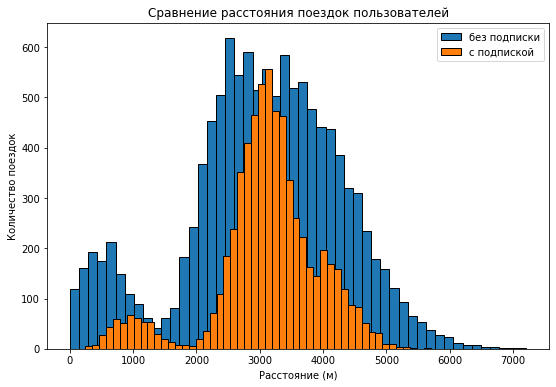

In [27]:
#сравнение расстояния поездок пользователей

plt.figure(figsize=(9, 6))
data_free['distance'].plot(kind='hist', bins=50, edgecolor='black', label='без подписки')
data_ultra['distance'].plot(kind='hist', bins=50, edgecolor='black', label='с подпиской')
plt.title('Сравнение расстояния поездок пользователей')
plt.xlabel('Расстояние (м)')
plt.ylabel('Количество поездок');
plt.legend()
plt.show()

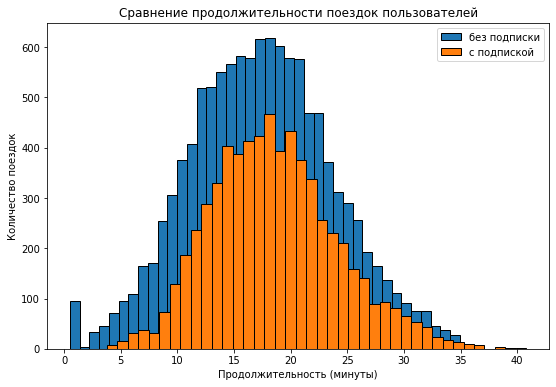

In [28]:
#визуализация продолжительности для пользователей без подписки

plt.figure(figsize=(9, 6))
data_free['duration'].plot(kind='hist', bins=40, edgecolor='black', label='без подписки')
data_ultra['duration'].plot(kind='hist', bins=40, edgecolor='black', label='с подпиской')
plt.title('Сравнение продолжительности поездок пользователей')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

In [29]:
# Статистика по расстоянию для пользователей с подпиской и без

print("Статистика расстояния поездок для пользователей с подпиской:")
print(data_ultra['distance'].describe().round(1))
print("\nСтатистика расстояния поездок для пользователей без подписки:")
print(data_free['distance'].describe().round(1))

# Статистика по продолжительности для пользователей с подпиской и без

print("\nСтатистика продолжительности поездок для пользователей с подпиской:")
print(data_ultra['duration'].describe().round(1))
print("\nСтатистика продолжительности поездок для пользователей без подписки:")
print(data_free['duration'].describe().round(1))


Статистика расстояния поездок для пользователей с подпиской:
count    6500.0
mean     3115.4
std       836.9
min       244.2
25%      2785.4
50%      3148.6
75%      3560.6
max      5699.8
Name: distance, dtype: float64

Статистика расстояния поездок для пользователей без подписки:
count    11568.0
mean      3045.5
std       1246.2
min          0.9
25%       2366.6
50%       3114.6
75%       3905.7
max       7211.0
Name: distance, dtype: float64

Статистика продолжительности поездок для пользователей с подпиской:
count    6500.0
mean       18.5
std         5.6
min         3.8
25%        14.5
50%        18.2
75%        21.9
max        40.8
Name: duration, dtype: float64

Статистика продолжительности поездок для пользователей без подписки:
count    11568.0
mean        17.4
std          6.3
min          0.5
25%         13.0
50%         17.3
75%         21.6
max         34.9
Name: duration, dtype: float64


**Пользователи с подпиской**, как правило, ездят чуть дальше в среднем — около **3115 м**, когда как пользователи **без подписки** в среднем ездят **3045 м**.

У пользователей **без подписки** гораздо **больше разброс** в пройденных расстояниях, возможно они **экспериментируют** с сервисом или используют его для **случайных поездок**. 

**Подписчики** в среднем проводят в поездке около **18.5 мин**, в то время как пользователи **без подписки** — около **17.4 мин.**, что показывает регулярность в использовании сервиса **подписчиками.**



## Подсчёт выручки

### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [34]:
#добавим округленное время поездки для расчета

data['duration_ceil'] = np.ceil(data['duration'])

In [35]:
agg_data = data.groupby(['user_id', 'month']).agg(
    total_distance=('distance', 'sum'),
    total_rides=('distance', 'count'),
    total_duration=('duration_ceil', 'sum'),
    subscription_type=('subscription_type', 'first'),
    minute_price=('minute_price', 'first'),
    start_ride_price=('start_ride_price', 'first'),
    subscription_fee=('subscription_fee', 'first')
).reset_index()

agg_data

,user_id,month,total_distance,total_rides,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,2,42.0,ultra,6,0,199
1,1,4,754.159807,1,7.0,ultra,6,0,199
2,1,8,6723.470560,2,46.0,ultra,6,0,199
3,1,10,5809.911100,2,32.0,ultra,6,0,199
4,1,11,7003.499363,3,56.0,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,free,8,50,0
11327,1534,8,7622.453034,2,48.0,free,8,50,0
11328,1534,9,4928.173852,1,23.0,free,8,50,0
11329,1534,11,13350.015305,4,78.0,free,8,50,0


### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [36]:
#определяем условия для разных типов подписок

def calculate_revenue(row):
    if row['subscription_type'] == 'free':
        return row['total_duration'] * row['minute_price'] + row['total_rides'] * row['start_ride_price']
    elif row['subscription_type'] == 'ultra':
        return row['total_duration'] * row['minute_price'] + row['subscription_fee']
    
#применяем функцию для расчёта выручки
agg_data['total_revenue'] = agg_data.apply(calculate_revenue, axis=1)
display(agg_data)


agg_data.isna().sum()

,user_id,month,total_distance,total_rides,total_duration,subscription_type,minute_price,start_ride_price,subscription_fee,total_revenue
0,1,1,7027.511294,2,42.0,ultra,6,0,199,451.0
1,1,4,754.159807,1,7.0,ultra,6,0,199,241.0
2,1,8,6723.470560,2,46.0,ultra,6,0,199,475.0
3,1,10,5809.911100,2,32.0,ultra,6,0,199,391.0
4,1,11,7003.499363,3,56.0,ultra,6,0,199,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,3409.468534,2,26.0,free,8,50,0,308.0
11327,1534,8,7622.453034,2,48.0,free,8,50,0,484.0
11328,1534,9,4928.173852,1,23.0,free,8,50,0,234.0
11329,1534,11,13350.015305,4,78.0,free,8,50,0,824.0


user_id              0
month                0
total_distance       0
total_rides          0
total_duration       0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
total_revenue        0
dtype: int64

#абонентская плата для пользователей с подпиской
subscription_fee = data['subscription_fee']

#добавляем абонентскую плату к выручке для пользователей с подпиской
agg_data['revenue_with_subscription'] = agg_data.apply(
    lambda row: row['total_revenue']
    + (subscription_fee * 12) if row['subscription_type'] == 'ultra' else row['total_revenue'],
    axis=1
)


#годовая выручка с учетом подписки для каждого тарифа
yearly_revenue = agg_data.groupby('subscription_type')['revenue_with_subscription'].sum().reset_index()
yearly_revenue = yearly_revenue.rename(columns={'revenue_with_subscription': 'yearly_revenue'})
yearly_revenue


#количество пользователей
user_counts = agg_data.groupby('subscription_type')['user_id'].nunique().reset_index()
user_counts = user_counts.rename(columns={'user_id': 'user_count'})
user_counts

#месячная выручка
monthly_revenue = yearly_revenue.copy()
monthly_revenue['monthly_revenue'] = monthly_revenue['yearly_revenue'] / 12

monthly_revenue.round()

#месячная выручка для 1 пользователя
monthly_revenue_per_user = monthly_revenue.merge(user_counts, on='subscription_type')
monthly_revenue_per_user['monthly_revenue_per_user'] = (
   monthly_revenue_per_user['monthly_revenue'] / monthly_revenue_per_user['user_count']
)
monthly_revenue_per_user.round()

## Проверка гипотез

### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [37]:
# H0: Средняя продолжительность поездки у пользователей с подпиской
#     меньше или равна средней продолжительности у пользователей без подписки.
# H1: Средняя продолжительность поездки у пользователей с подпиской
#     больше средней продолжительности у пользователей без подписки.

alpha = 0.05

results = st.ttest_ind(
    data_ultra['duration'], 
    data_free['duration'],
    equal_var=False,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


In [38]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Пользователи с подпиской **платят меньше за минуту поездки**, но проводят больше времени на самокате.
Если компания рассчитывает на выручку **с продолжительности поездок**, то пользователи с подпиской могут принести меньше прибыли за минуту, но из-за большей продолжительности поездок общая прибыль может быть выше.

Кроме того, пользователи с подпиской платят **ежемесячную абонентскую плату**, что может компенсировать меньшую стоимость минуты и сделать подписку выгодной для бизнеса **в долгосрочной перспективе**.

### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

In [39]:
# H0: Среднее расстояние поездки у пользователей с подпиской меньше или равно 3130 метров.

# H1: Среднее расстояние поездки у пользователей с подпиской больше 3130 метров.

alpha = 0.05
one_duration_mean = 3130

results = st.ttest_1samp(
    data_ultra['distance'],
    one_duration_mean,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение: 0.9195368847849785
Не можем отвергнуть нулевую гипотезу


Мы **не можем отвергнуть нулевую гипотезу**, а значит, нет оснований полагать, что пользователи с подпиской ездят больше 3130 метров. Скорее всего, их **среднее расстояние** либо такое же, либо меньше, так что **износ самокатов остаётся в норме.**

Раз текущие условия эксплуатации самокатов являются приемлемыми для пользователей с подпиской, **бизнесу** можно сосредоточить усилия на оптимизации технического обслуживания для продления срока службы самокатов.

### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

In [41]:
#H0: Средняя помесячная выручка от пользователей с подпиской 
#    меньше или равна выручке от пользователей без подписки.
#H1: Средняя помесячная выручка от пользователей с подпиской больше, 
#    чем выручка от пользователей без подписки.

data_ultra = agg_data[agg_data['subscription_type'] == 'ultra']
data_free = agg_data[agg_data['subscription_type'] == 'free']

alpha = 0.05

results = st.ttest_ind(
    data_ultra['total_revenue'], 
    data_free['total_revenue'],
    equal_var=False,
    alternative='greater'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Средняя помесячная выручка от пользователей с подпиской** выше, чем выручка от пользователей без подписки. Модель подписки **выгодна для бизнеса**, так как приносит больше дохода в сравнении с оплатой по минутам без подписки.

Бизнесу стоит **акцентировать** усилия на привлечение большего числа пользователей в подписку, возможно, через **маркетинговые кампании или улучшение условий подписки.**

Ранее я добавлял колонку revenue в data_ultra и data_free, и код работал корректно. Однако позже я удалил её, так как столкнулся с ошибками в процессе работы и немного запутался в структуре данных. 

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Будет использоваться **парный t-тест**. Этот тест подходит, когда нужно сравнить данные до и после какого-либо события для одних и тех же наблюдений

In [42]:
#H0: количество обращений в техподдержку не изменилось или увеличилось после обновления серверов.
#H1: количество обращений в техподдержку снизилось после обновления серверов.

before = np.random.randint(5, 20, size=30)  
after = np.random.randint(3, 15, size=30)

alpha = 0.05

results = st.ttest_rel(before, after, alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не можем отвергнуть нулевую гипотезу")
    

p-значение: 0.9999966073569301
Не можем отвергнуть нулевую гипотезу


Обновление серверов действительно привело к значительному снижению количества обращений в техподдержку. Для бизнеса это может повысить уровень удовлетворенности пользователей и уменьшить затраты на обслуживание техподдержки. Стоит продолжать работу с поддержанием стабильного функционирования серверов для стабильной работы приложения и поддержания низкой обращенности пользователей в тех поддержку. 

## Итоговый вывод и рекомендации для бизнеса

### Основные статистики по группам пользователей:
**Без подписки:**

- Среднее расстояние поездки: 3045 м.
- Средняя продолжительность поездки: 17,4 минут.
- Количество пользователей: 846.
- Среднемесячная выручка на одного пользователя: 223 руб.
- Годовая выручка: 2 234 104 руб.

**С подпиской:**

- Среднее расстояние поездки: 3115 м.
- Средняя продолжительность поездки: 18,5 минут.
- Количество пользователей: 719.
- Среднемесячная выручка на одного пользователя: 196 руб.
- Годовая выручка: 1 644 537 руб.

### Выводы по гипотезам:

- Пользователи с подпиской проводят больше времени на самокатах, компенсируя меньшую стоимость минуты за счет абонентской платы. Среднее расстояние поездки не превышает 3130 метров, что сохраняет износ самокатов на нормальном уровне.

- Помесячная выручка от подписчиков выше, что делает их ключевыми для стабильности доходов.

- Обновление серверов значительно снизило обращения в техподдержку, что улучшило удовлетворенность пользователей и сократило затраты.

### Сравнение показателей выручки:

- Годовая выручка: Годовая выручка от пользователей с подпиской (12,469,341 руб.) значительно выше, чем от пользователей без подписки (2,234,104 руб.). Это указывает на то, что модель подписки приносит значительно больше дохода за счет абонентской платы и продолжительности поездок.
Среднемесячная выручка на одного пользователя: Среднемесячная выручка на одного пользователя с подпиской (1,487 руб.) значительно выше, чем у пользователей без подписки (223 руб.). Это говорит о том, что подписчики, несмотря на меньшую стоимость поездок, приносят больше дохода в среднем за месяц за счет фиксированной абонентской платы.
Заключение: Модель подписки значительно более выгодна для бизнеса как по общему доходу, так и по доходу с каждого пользователя. Подписчики приносят больше дохода за счет абонентской платы, а также дольше пользуются самокатами. В долгосрочной перспективе продвижение подписок будет более эффективной стратегией для увеличения прибыли компании.

### Рекомендации для бизнеса:
- Модель подписки приносит стабильный доход и демонстрирует лояльность пользователей, что делает её привлекательной для бизнеса в долгосрочной перспективе.
- Стоит акцентировать внимание на привлечении новых подписчиков через улучшение условий подписки и маркетинговые кампании.

**Операционные улучшения:**

- Снижение количества обращений в техподдержку после обновления серверов позволяет улучшить пользовательский опыт и сократить операционные затраты. Продолжение работы по поддержанию стабильной работы серверов будет полезно для поддержания уровня удовлетворенности пользователей.

#### Шаг 7. Распределения

## Бонус

### Задача 7.1 — декомпозиция

+ Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. 

+ То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

+ Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. 

+ Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 

+ Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

+ 100 существующих клиентов должны продлить эту подписку.
 + т.е. мы ищем х - кол-во промокодов, которое мы раздадим, чтобы сохранить 100 клиентов

+ может либо отказаться от неё, либо продлить
 + т.е. два исхода

+ подписку продлевают 10 % пользователей
 + т.е. из кол-ва Х, которое мы найдем и по которому разошлем промокоды, полагаясь на предыдущий опыт, продлят подписку 10%

+ вероятность не выполнить план была примерно 5 %
 + т.е. мы должны найти вероятность успеха нашей акции 1-0,05 = 95%
 + этот план будет иметь свою вероятность исполнения при разном кол-ве Х, т.е. если мы выберем Х = 1000, вероятность успеха будет равна А, при 2000 промокодах, вероятность будет равна В. Но, увеличивая кол-во промокодов, мы увеличиваем трудозатраты ... По этой причине нас устроит вероятность успеха 95%, для которой и предстоит рассчитать кол-во промокодов Х

Получается задача делиться на две части

+ число положительных исходов должно быть равно 100-ам

+ но вероятность такого события должна быть равна 95% 



Урок

Percent Point Function для нормального распределения
+ Ранее вы познакомились с функцией распределения, или кумулятивной функцией распределения.



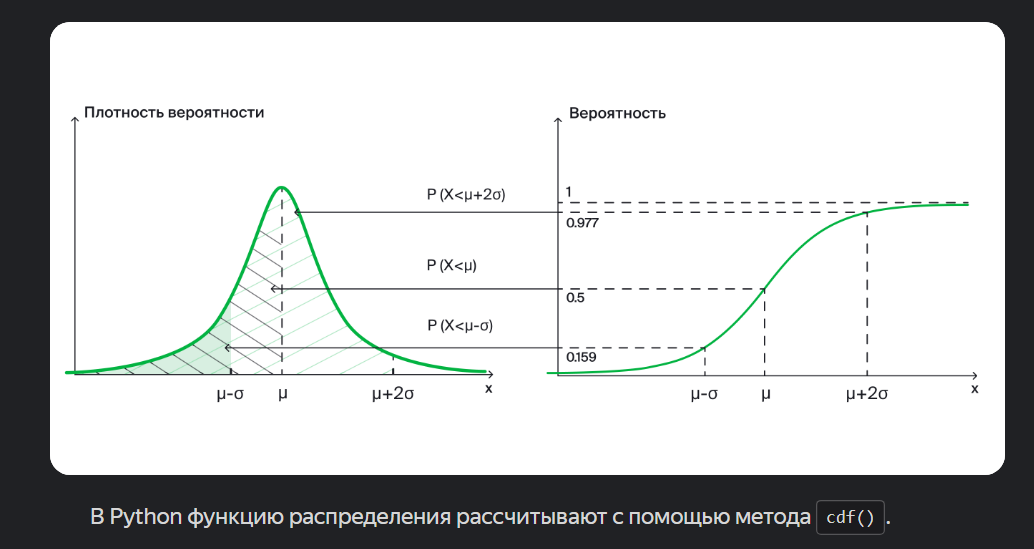

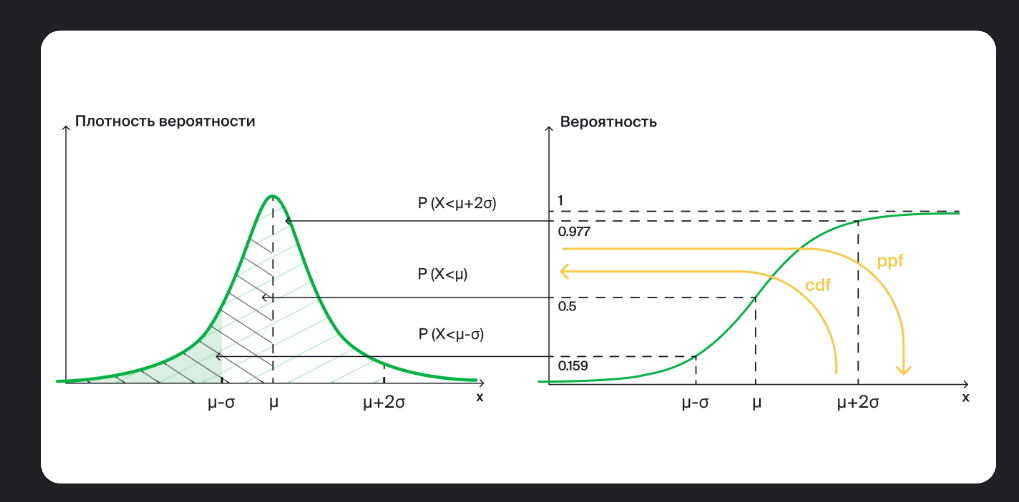

In [43]:
for i in range (1, 13):
    trials = 100 * i
    print(f"i: {i, trials}\tprobability: {(st.binom.cdf(99, trials, 0.1)).round(3)}")

i: (1, 100)	probability: 1.0
i: (2, 200)	probability: 1.0
i: (3, 300)	probability: 1.0
i: (4, 400)	probability: 1.0
i: (5, 500)	probability: 1.0
i: (6, 600)	probability: 1.0
i: (7, 700)	probability: 1.0
i: (8, 800)	probability: 0.987
i: (9, 900)	probability: 0.854
i: (10, 1000)	probability: 0.485
i: (11, 1100)	probability: 0.145
i: (12, 1200)	probability: 0.022


In [44]:
for i in range (1, 13):
    trials = 100 * i
    print(f"i: {i, trials}\ttarget_probability: {(1 - st.binom.cdf(99, trials, 0.1)).round(3)}");    
   
print(f"i: {13, 1161}\ttarget_probability: {(1 - st.binom.cdf(99, 1161, 0.1)).round(3)}")

i: (1, 100)	target_probability: 0.0
i: (2, 200)	target_probability: 0.0
i: (3, 300)	target_probability: 0.0
i: (4, 400)	target_probability: 0.0
i: (5, 500)	target_probability: 0.0
i: (6, 600)	target_probability: 0.0
i: (7, 700)	target_probability: 0.0
i: (8, 800)	target_probability: 0.013
i: (9, 900)	target_probability: 0.146
i: (10, 1000)	target_probability: 0.515
i: (11, 1100)	target_probability: 0.855
i: (12, 1200)	target_probability: 0.978
i: (13, 1161)	target_probability: 0.95


        
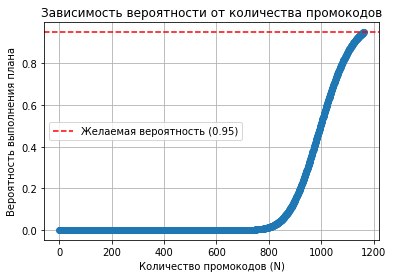        

### check

In [45]:
dfg1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

dfr4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
        "E": [np.nan, np.nan, np.nan, np.nan]
    },
    index=[2, 3, 6, 0],
)

In [46]:
display(dfg1, dfr4)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,B,D,F,E
2,B2,D2,F2,NaN
3,B3,D3,F3,NaN
6,B6,D6,F6,NaN
0,B7,D7,F7,NaN


In [47]:
dfg1.merge(dfr4, left_on=dfg1.index, right_on=dfr4.index, how='outer')

,key_0,A,B_x,C,D_x,B_y,D_y,F,E
0,0,A0,B0,C0,D0,B7,D7,F7,NaN
1,1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,2,A2,B2,C2,D2,B2,D2,F2,NaN
3,3,A3,B3,C3,D3,B3,D3,F3,NaN
4,6,NaN,NaN,NaN,NaN,B6,D6,F6,NaN


In [48]:
dfg1.merge(dfr4, 'outer')

,A,B,C,D,F,E
0,A0,B0,C0,D0,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN
2,A2,B2,C2,D2,F2,NaN
3,A3,B3,C3,D3,F3,NaN
4,NaN,B6,NaN,D6,F6,NaN
5,NaN,B7,NaN,D7,F7,NaN


In [49]:
dfg1.merge(dfr4)

,A,B,C,D,F,E
0,A2,B2,C2,D2,F2,NaN
1,A3,B3,C3,D3,F3,NaN


In [50]:
dfg1.merge(dfr4, 'inner')

,A,B,C,D,F,E
0,A2,B2,C2,D2,F2,NaN
1,A3,B3,C3,D3,F3,NaN


####  check при объединении таблиц без пропусков получаем пропуски

In [51]:
dfg1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

dfr4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
        
        
    },
    index=[2, 3, 6, 0],
)

In [52]:
dfg1.merge(dfr4, how='outer')

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,F2
3,A3,B3,C3,D3,F3
4,NaN,B6,NaN,D6,F6
5,NaN,B7,NaN,D7,F7


### check

In [53]:
dfg_first = agg_data.copy()
dfg_first.columns

Index(['user_id', 'month', 'total_distance', 'total_rides', 'total_duration',
       'subscription_type', 'minute_price', 'start_ride_price',
       'subscription_fee', 'total_revenue'],
      dtype='object')

In [54]:
x = 'subscription_type'
y = dfg_first.columns[-1]
y

'total_revenue'

In [55]:
dfg_first.groupby(x)[y].mean().round(1).to_frame()

,total_revenue
subscription_type,
free,328.6
ultra,362.8


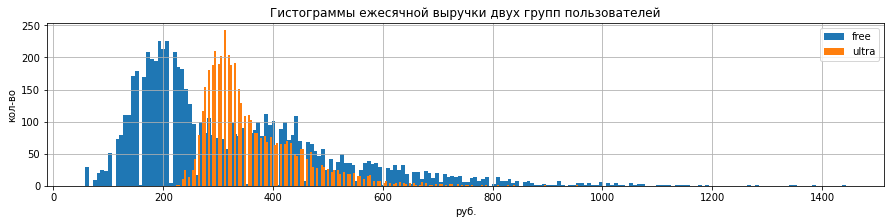

In [56]:
dfg_first.groupby(x)[y].hist(bins=200, figsize=(15,3), legend=True)
plt.title('Гистограммы ежесячной выручки двух групп пользователей')
plt.xlabel('руб.')
plt.ylabel('кол-во');

In [57]:
# копируем таблицу
dfg = dfg_first.copy()


In [58]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            11331 non-null  int64  
 1   month              11331 non-null  int64  
 2   total_distance     11331 non-null  float64
 3   total_rides        11331 non-null  int64  
 4   total_duration     11331 non-null  float64
 5   subscription_type  11331 non-null  object 
 6   minute_price       11331 non-null  int64  
 7   start_ride_price   11331 non-null  int64  
 8   subscription_fee   11331 non-null  int64  
 9   total_revenue      11331 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 885.4+ KB


In [59]:
# удаляем данные, 20%
for col in dfg.columns:
    dfg.loc[dfg.sample(frac=0.2).index, col] = np.nan

In [60]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11331 entries, 0 to 11330
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            9065 non-null   float64
 1   month              9065 non-null   float64
 2   total_distance     9065 non-null   float64
 3   total_rides        9065 non-null   float64
 4   total_duration     9065 non-null   float64
 5   subscription_type  9065 non-null   object 
 6   minute_price       9065 non-null   float64
 7   start_ride_price   9065 non-null   float64
 8   subscription_fee   9065 non-null   float64
 9   total_revenue      9065 non-null   float64
dtypes: float64(9), object(1)
memory usage: 885.4+ KB


In [61]:
dfg.groupby(x)[y].mean().round(1).to_frame()

,total_revenue
subscription_type,
free,327.6
ultra,362.8


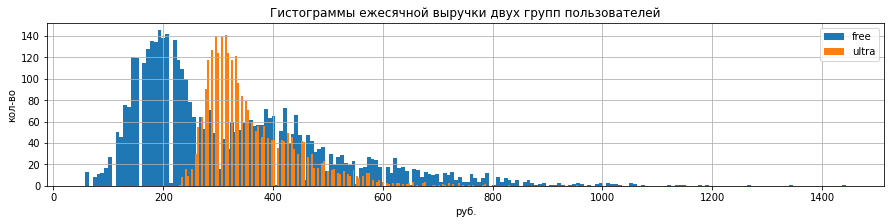

In [62]:
dfg.groupby(x)[y].hist(bins=200, figsize=(15,3), legend=True)
plt.title('Гистограммы ежесячной выручки двух групп пользователей')
plt.xlabel('руб.')
plt.ylabel('кол-во');